<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/release/List1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # install
!pip install flake8
!pip install pycodestyle pycodestyle_magic


# # load
%load_ext pycodestyle_magic

%pycodestyle_on

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 941.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#Zadanie 1

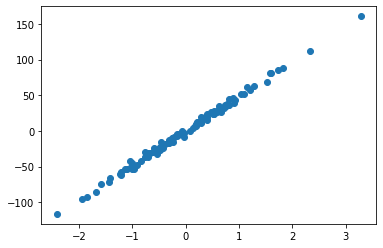

In [3]:
# Data without modification
x_data, y_data = make_regression(n_samples=100, n_features=1, noise=3)

plt.scatter(x_data, y_data)
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

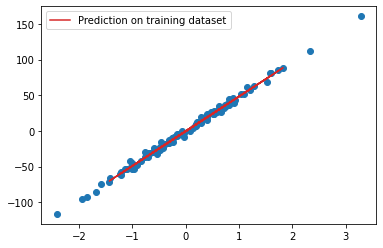

Estimated coefficients: [[48.6741074]]
Independent term: [-0.37549645]


In [5]:
linreg = LinearRegression().fit(x_train,
                                y_train)

y_test_predict = linreg.predict(x_test)
y_train_predict = linreg.predict(x_train).reshape(-1, 1)

plt.scatter(x_data, y_data)

# plt.plot(x_train,
#          y_train_predict,
#          color='tab:green',
#          label="Prediction on training dataset")

plt.plot(x_test, y_test_predict, color='tab:red',
         label="Prediction on training dataset")
plt.legend()
plt.show()

print(f'Estimated coefficients: {linreg.coef_}')
print(f'Independent term: {linreg.intercept_}')

# Zadanie 2

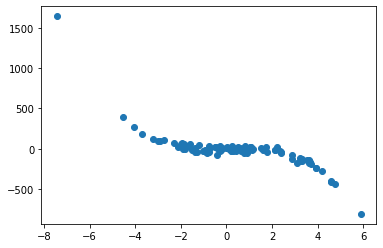

INFO:pycodestyle:7:1: E305 expected 2 blank lines after class or function definition, found 1


In [27]:
def make_polynomial_regression(n_samples=100.0, noise=0.1,
                               degree=2, x_axis_span=2.5):
    X = x_axis_span*np.random.randn(n_samples)
    y = 4 + 2*X + (-4)*X**degree + noise*np.random.randn(n_samples)
    return X, y, degree

n = 100
noise = 30

x_data, y_data, degree = make_polynomial_regression(n, noise, 3)

plt.scatter(x_data, y_data)
plt.show()

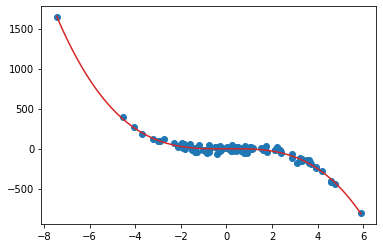

Estimated coefficients:  [-4.02834169  0.11400833  1.56438194 -2.90137661]


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

mymodel = np.poly1d(np.polyfit(x_train, y_train, degree))

x_for_plot = np.linspace(np.min(x_data), np.max(x_data), 100)

plt.scatter(x_data, y_data)

y_train_predict = mymodel(x_for_plot)

plt.plot(x_for_plot, y_train_predict, color="tab:red")
plt.show()

print(f'Estimated coefficients:  {mymodel.coefficients}')

# Zadanie 3

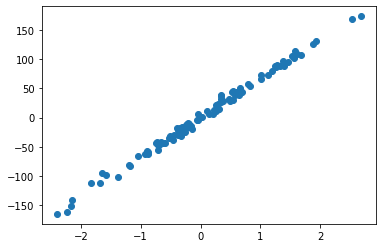

In [29]:
x_data, y_data = make_regression(n_samples=100, n_features=1, noise=5)

plt.scatter(x_data, y_data)
plt.show()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

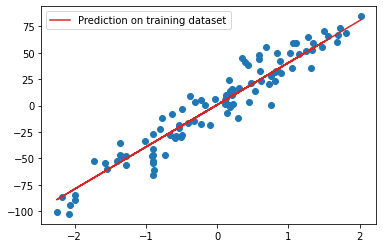

Estimated coefficients: [[39.83946215]]
Independent term: [0.70980937]


In [40]:
ridge_reg = Ridge(alpha=1.0).fit(x_train, y_train)

y_test_predict = ridge_reg.predict(x_test)
y_train_predict = ridge_reg.predict(x_train)

plt.scatter(x_data, y_data)

# plt.plot(x_train,
#          y_train_predict,
#          color='tab:green',
#          label="Prediction on training dataset")

plt.plot(x_test, y_test_predict, color='tab:red',
         label="Prediction on training dataset")

plt.legend()
plt.show()

print(f'Estimated coefficients: {ridge_reg.coef_}')
print(f'Independent term: {ridge_reg.intercept_}')

# Zad 3 CV

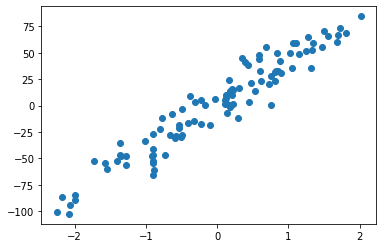

In [32]:
x_data, y_data = make_regression(n_samples=100, n_features=1, noise=12)

plt.scatter(x_data, y_data)
plt.show()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [34]:
r_alphas = np.logspace(0, 7, 200)

ridge_model = RidgeCV(alphas=r_alphas, store_cv_values=True)

ridge_reg = ridge_model.fit(x_train, y_train)

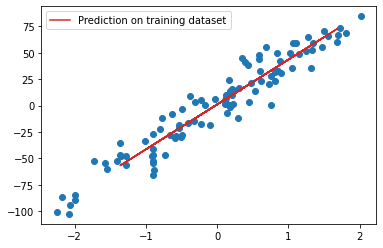

Alpha: 1.0


In [35]:

y_test_predict = ridge_reg.predict(x_test)
y_train_predict = ridge_reg.predict(x_train)

plt.scatter(x_data, y_data)

# plt.plot(x_train,
#          y_train_predict,
#          color='tab:green',
#          label="Prediction on training dataset")

plt.plot(x_test, y_test_predict, color='tab:red',
         label="Prediction on training dataset")

plt.legend()
plt.show()

print(f'Alpha: {ridge_reg.alpha_}')

In [36]:

print(f'Estimated coefficients: {ridge_reg.coef_}')
print(f'Independent term: {ridge_reg.intercept_}')

Estimated coefficients: [[42.44284764]]
Independent term: [1.07012175]
